In [2]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [22]:
image_path = '../images/29e1b0e032ff2e5d9ebe3668701b702f.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, channels = image_rgb.shape
rgb_dataset = np.reshape(image_rgb, (height * width, 3))
rgb_dataset = pd.DataFrame(rgb_dataset, columns=['red', 'green', 'blue'])

In [23]:
rgb_dataset

,red,green,blue
0,255,255,255
1,255,255,255
2,255,255,255
3,255,255,255
4,255,255,255
...,...,...,...
404475,255,255,255
404476,255,254,255
404477,255,254,255
404478,255,253,255


1
2
3
4
5
6
7
8
9
10


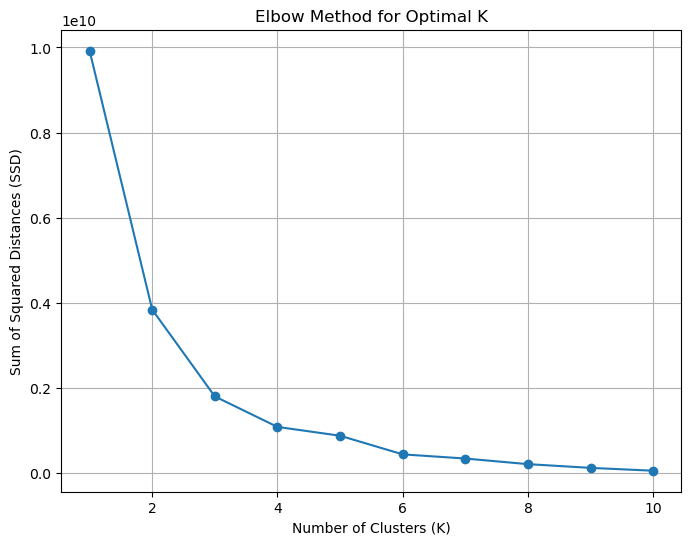

In [25]:
ssd = []
K_range = range(1, 11)

for k in K_range:
    print(k)
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(rgb_dataset)
    ssd.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, ssd, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.grid(True)
plt.show()

In [47]:
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42, n_init='auto')
kmeans.fit(rgb_dataset)
cluster_labels = kmeans.labels_

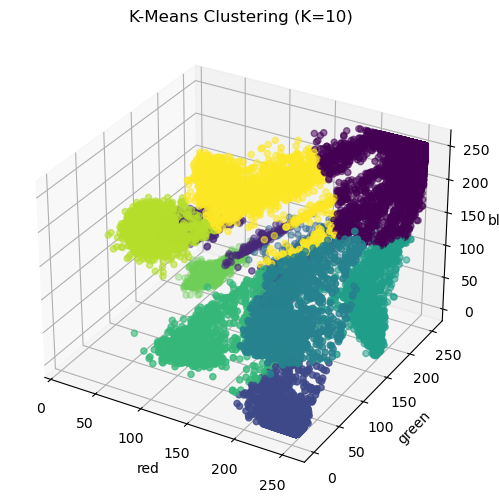

In [48]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rgb_dataset['red'], rgb_dataset['green'], rgb_dataset['blue'], c=cluster_labels)

ax.set_title('K-Means Clustering (K=10)')
ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue')

plt.show()

In [49]:
rgb_dataset['cluster_label'] = cluster_labels
rgb_dataset_grpby = rgb_dataset.groupby('cluster_label').agg(red=('red','mean'), green=('green', 'mean'), blue=('blue', 'mean'), proportion=('cluster_label', 'count')).reset_index(drop=True)
rgb_dataset_grpby['relative_proportion'] = round((rgb_dataset_grpby['proportion']/sum(rgb_dataset_grpby['proportion']))*100, 2)
rgb_dataset_grpby = rgb_dataset_grpby.sort_values('relative_proportion', ascending=False)
rgb_dataset_grpby['red'] = rgb_dataset_grpby['red'].astype(int)
rgb_dataset_grpby['green'] = rgb_dataset_grpby['green'].astype(int)
rgb_dataset_grpby['blue'] = rgb_dataset_grpby['blue'].astype(int)
rgb_dataset_grpby.drop(columns='proportion', inplace=True)

In [50]:
rgb_dataset_grpby

,red,green,blue,relative_proportion
0,253,254,253,43.25
1,53,153,128,7.91
7,64,165,41,6.34
9,82,160,201,6.32
5,253,166,35,6.31
4,239,6,127,6.15
6,146,2,74,6.08
8,46,87,165,6.06
3,129,196,30,6.04
2,252,1,1,5.55


In [51]:
fig = px.pie(
    rgb_dataset_grpby,
    values="relative_proportion",
    names=[f'Color {i}' for i in range(len(rgb_dataset_grpby))],
    color_discrete_sequence=[f'rgb({row["red"]}, {row["green"]}, {row["blue"]})' for index, row in rgb_dataset_grpby.iterrows()],
    title="RGB Color Proportions"
)
fig.update_layout(width=1000, height=800, template="plotly_dark")
fig.show()

In [3]:
cv2.__version__

'4.6.0'